# Data analysis

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

# Scipy offers many statistical functions, among which the Pearson and Spearman correlation measures.
from scipy.stats import pearsonr, spearmanr


### 1) Load datasets from BIN file

In [2]:
wes_title='wes2015'
aida_title='aida'
rss_title='rss500'
reuters_title='reuters128'

In [3]:
import pickle
with open('%s.bin' % aida_title, 'rb') as outfile:
    aida_articles=pickle.load(outfile)
with open('%s.bin' % wes_title, 'rb') as outfile:
    wes_articles=pickle.load(outfile)
with open('%s.bin' % rss_title, 'rb') as outfile:
    rss_articles=pickle.load(outfile)
with open('%s.bin' % reuters_title, 'rb') as outfile:
    reuters_articles=pickle.load(outfile)    


### 2) Distribution of AIDA collections 

In [4]:
from collections import defaultdict

d=defaultdict(int)
for article in aida_articles:
    d[article.collection]+=1
d

defaultdict(int, {'aidatesta': 216, 'aidatestb': 231, 'aidatrain': 946})

### 3) Get frequency distributions of forms and instances

In [5]:
#all_articles=aida_articles.union(wes_articles)
all_articles = rss_articles | reuters_articles | aida_articles | wes_articles

In [6]:
import time
import plot_utils

t1=time.time()
#print(example_article.identifier)
wes_cnt_instances, wes_cnt_forms=plot_utils.get_mention_counts(wes_articles)
aida_cnt_instances, aida_cnt_forms=plot_utils.get_mention_counts(aida_articles)
all_cnt_instances, all_cnt_forms=plot_utils.get_mention_counts(all_articles)
aida_cnt_instances.pop('--NME--', None)
t2=time.time()


### 4) Plot frequency distribution of FORMS

<span style="background-color:lightgreen">Section 5.1. of the paper</span>

**4.1. Linear plots **

In [7]:
import seaborn as sns
sns.set_style("whitegrid")

In [8]:
save=True

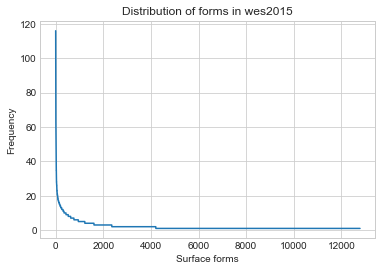

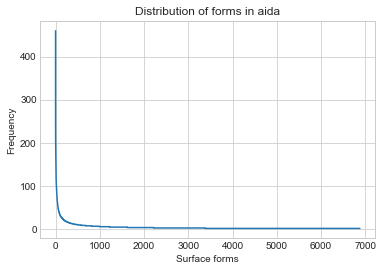

In [9]:
plot_utils.plot_freq_dist(wes_cnt_forms, 'forms in ' + wes_title, 
                          x_axis='Surface forms', save=save)
plot_utils.plot_freq_dist(aida_cnt_forms, 'forms in ' + aida_title, 
                          x_axis='Surface forms', save=save)

**4.2. Log-log plots**

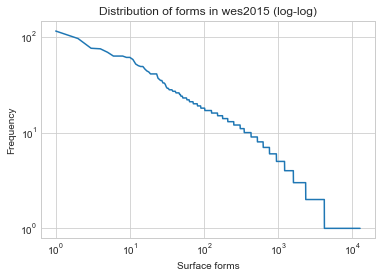

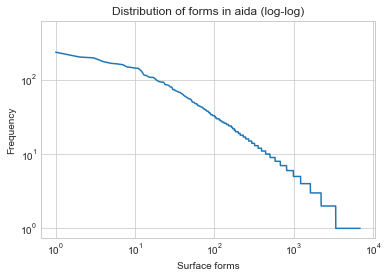

In [10]:
plot_utils.plot_freq_dist(wes_cnt_forms, 'forms in ' + wes_title, 
                          x_axis='Surface forms', loglog=True, 
                          b=10, save=save)
plot_utils.plot_freq_dist(aida_cnt_forms, 'forms in ' + aida_title, 
                          x_axis='Surface forms', loglog=True, 
                          b=10, save=save)

**4.3. Slope** 

In [11]:
import plot_utils
aida_slope=plot_utils.calculate_slope(aida_cnt_forms)
wes_slope=plot_utils.calculate_slope(wes_cnt_forms)
print(aida_slope)
print(wes_slope)

LinregressResult(slope=-0.0022036164183156324, intercept=11.620965629475819, rvalue=-0.37260300743819236, pvalue=1.8815464484624348e-225, stderr=6.6190701161751247e-05)
LinregressResult(slope=-0.00049347163012393794, intercept=5.3903221820524916, rvalue=-0.46468730737613617, pvalue=0.0, stderr=8.3165696362870735e-06)


### 5) Plot frequency distribution of INSTANCES

<span style="background-color:lightgreen">Section 5.1. of the paper</span>

**5.1. Linear plots **

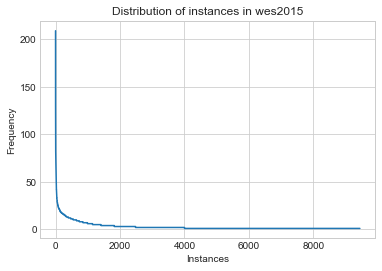

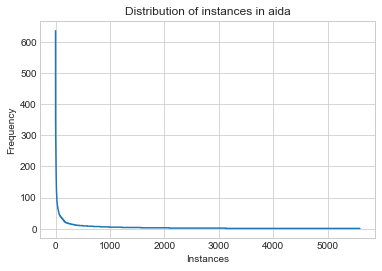

In [12]:
plot_utils.plot_freq_dist(wes_cnt_instances, 'instances in ' + wes_title, 
                          x_axis='Instances', save=save)
plot_utils.plot_freq_dist(aida_cnt_instances, 'instances in ' + aida_title, 
                          x_axis='Instances', save=save)

**5.2. Log-log plots**

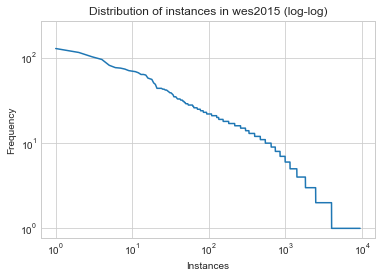

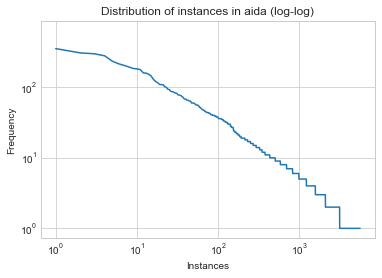

In [13]:
plot_utils.plot_freq_dist(wes_cnt_instances, 'instances in ' + wes_title, 
                          x_axis='Instances', loglog=True, 
                          b=10, save=save)
plot_utils.plot_freq_dist(aida_cnt_instances, 'instances in ' + aida_title, 
                          x_axis='Instances', loglog=True, 
                          b=10, save=save)

**5.3. Slope** 

In [14]:
import plot_utils
aida_slope=plot_utils.calculate_slope(aida_cnt_instances)
wes_slope=plot_utils.calculate_slope(wes_cnt_instances)
print(aida_slope)
print(wes_slope)

LinregressResult(slope=-0.0034990210669294578, intercept=14.75680125464558, rvalue=-0.3382295714741132, pvalue=1.0049300262640952e-149, stderr=0.00013019947269153514)
LinregressResult(slope=-0.00105588227994161, intercept=8.0121420692953293, rvalue=-0.49799538354507872, pvalue=0.0, stderr=1.8923012612086585e-05)


### 6) PageRank distribution of instances


#### 6.1. Obtain pagerank data

In [15]:
from collections import Counter

skip_zeros=True

wes_pr_agg, wes_pr_uniq, wes_pageranks =plot_utils.get_pageranks(wes_articles, skip_zeros=skip_zeros)
wes_pageranks = Counter(wes_pageranks)

aida_pr_agg, aida_pr_uniq, aida_pageranks =plot_utils.get_pageranks(aida_articles, skip_zeros=skip_zeros)
aida_pageranks = Counter(aida_pageranks)

#### 6.2. Plot the PR distribution

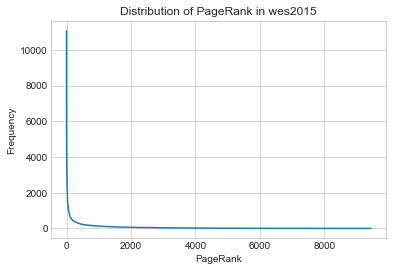

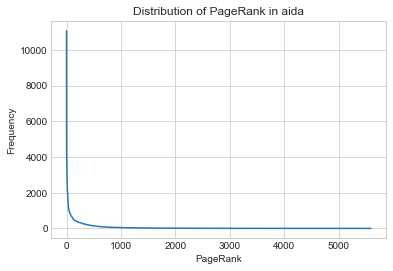

In [16]:
#plot_utils.plot_freq_dist(wes_cnt_instances, 'instances in ' + wes_title, 
#                          x_axis='Instances', save=save)
plot_utils.plot_freq_dist(wes_pageranks, 
                           title='PageRank in ' + wes_title, 
                           x_axis='PageRank', save=True)
plot_utils.plot_freq_dist(aida_pageranks, 
                           title='PageRank in ' + aida_title, 
                           x_axis='PageRank', save=True)

#### 6.3. Plot the PR distribution (log-log plot)

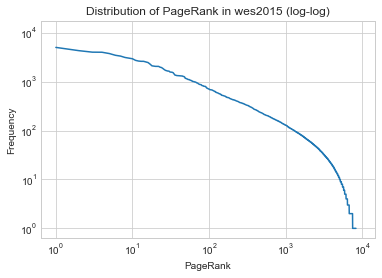

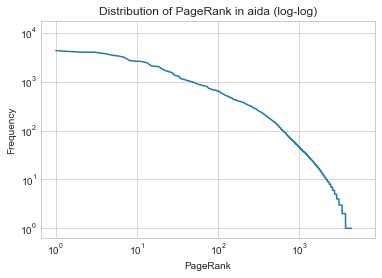

In [17]:
plot_utils.plot_freq_dist(wes_pageranks, 'PageRank in ' + wes_title, 
                          x_axis='PageRank', loglog=True, 
                          b=10, save=save)
plot_utils.plot_freq_dist(aida_pageranks, 'PageRank in ' + aida_title, 
                          x_axis='PageRank', loglog=True, 
                          b=10, save=save)

#### 6.4. Inspect individual pagerank

In [18]:
# United_States has a max pageRank of 11066. 
pr=11066
print(wes_pr_agg[pr], aida_pr_agg[pr], wes_pr_uniq[pr])


116 636 1


In [19]:
aida_pageranks['United_States']

11066

# Note: from here onwards most plots given stats for both datasets jointly


### 7) Prepare ambiguity and variance data

In [20]:
interpretations, references = plot_utils.get_interpretations_and_references(all_articles, skip_nils=True)

### 8) Aggregation per ambiguity

<span style="background-color:lightgreen">Section 5.2. of the paper</span>

In [21]:
ambiguity={}
for form,meanings in interpretations.items():
    ambiguity[form]=len(meanings)
ambiguity

{'TOKYO': 1,
 'COSTA RICA': 1,
 'CHILE': 1,
 'LIBERIA': 1,
 'Costa Rica': 2,
 'Chile': 3,
 'Marcelo Salas': 1,
 'BRAVES': 1,
 'CUBS': 1,
 'ATLANTA': 4,
 'Fred McGriff': 1,
 'Atlanta Braves': 1,
 'Chicago Cubs': 1,
 'McGriff': 1,
 'Brad Clontz': 1,
 'Atlanta': 3,
 'Colorado': 2,
 'Mark Thompson': 1,
 'Ellis Burks': 1,
 'Colorado Rockies': 1,
 'Pittsburgh Pirates': 1,
 'Vinny Castilla': 1,
 'Dante Bichette': 1,
 'Florida': 2,
 'Kevin Brown': 1,
 'Kurt Abbott': 1,
 'Florida Marlins': 1,
 'Cincinnati Reds': 1,
 'Marlins': 1,
 'Reds': 1,
 'Los Angeles': 2,
 'Tom Candiotti': 1,
 'Mike Piazza': 1,
 'Todd Hollandsworth': 1,
 'Los Angeles Dodgers': 1,
 'New York Mets': 1,
 'Candiotti': 1,
 'San Diego': 2,
 'Joey Hamilton': 1,
 'Rickey Henderson': 1,
 'San Diego Padres': 1,
 'Philadelphia Phillies': 1,
 'Hamilton': 3,
 'San Francisco': 2,
 'Pedro Martinez': 1,
 'David Segui': 1,
 'Montreal Expos': 1,
 'San Francisco Giants': 1,
 'Martinez': 2,
 'Houston': 3,
 'Orlando Miller': 1,
 'Todd Stottlem

In [22]:
agg_per_ambiguity=defaultdict(int)
for form, amb in ambiguity.items():
    agg_per_ambiguity[amb]+=1

In [23]:
agg_per_ambiguity

defaultdict(int, {1: 18840, 2: 840, 3: 170, 4: 46, 5: 19, 6: 7, 7: 1, 12: 1})

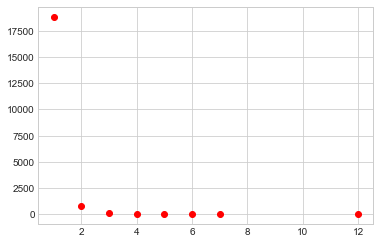

In [24]:
import matplotlib.pyplot as plt

plt.plot(list(agg_per_ambiguity.keys()), list(agg_per_ambiguity.values()), 'ro')
plt.show()

In [25]:
sum(i for j,i in agg_per_ambiguity.items() if j>1)

1084

['AIDA (with NILs)', 'AIDA (with NILs)', 'AIDA (with NILs)', 'AIDA (with NILs)', 'AIDA (with NILs)', 'AIDA (with NILs)', 'AIDA (with NILs)', 'AIDA (with NILs)', 'AIDA (with NILs)', 'AIDA (with NILs)', 'AIDA (with NILs)', 'AIDA (with NILs)', 'AIDA (with NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'both', 'both', 'both', 'both', 'both', 'both', 'both', 'both', 'both', 'both', 'both', 'both', 'both'] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13] [10393, 465, 114, 26

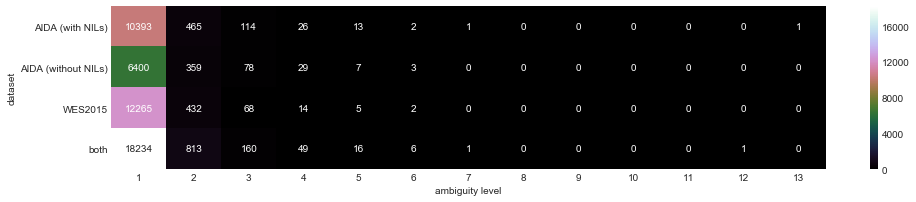

In [26]:
plot_utils.annotated_heatmap(['AIDA (with NILs)', 'AIDA (without NILs)', 'WES2015', 'both'], 
                  [1,2,3,4,5,6,7,8,9,10,11,12,13], 
                  [10393, 465, 114, 26, 13, 2, 1, 0, 0, 0, 0, 0, 1,
                   6400, 359, 78, 29, 7, 3, 0, 0, 0, 0, 0, 0, 0,
                    12265, 432, 68, 14, 5, 2, 0, 0, 0, 0, 0, 0, 0,
                   18234, 813, 160, 49, 16, 6, 1, 0, 0, 0, 0, 1, 0
                  ], 
                 x_lbl='ambiguity level')

#### AIDA: This means that there are 622 (or 477 without NILs) out of ~11k forms that have some ambiguity in the data

### 9) Aggregation per variance

<span style="background-color:lightgreen">Section 5.3. of the paper</span>

In [27]:
variance={}
for meaning,forms in references.items():
    variance[meaning]=len(forms)
variance

{'Tokyo': 2,
 'Costa_Rica_national_football_team': 2,
 'Chile_national_football_team': 2,
 'Liberia': 3,
 'Costa_Rica': 2,
 'Marcelo_Salas': 1,
 'Atlanta_Braves': 5,
 'Chicago_Cubs': 5,
 'Atlanta': 2,
 'Fred_McGriff': 2,
 'Brad_Clontz': 1,
 'Colorado': 2,
 'Mark_Thompson_(baseball)': 1,
 'Ellis_Burks': 1,
 'Colorado_Rockies': 4,
 'Pittsburgh_Pirates': 4,
 'Vinny_Castilla': 2,
 'Dante_Bichette': 1,
 'Miami_Marlins': 5,
 'Kevin_Brown_(right-handed_pitcher)': 2,
 'Kurt_Abbott': 1,
 'Cincinnati_Reds': 5,
 'Los_Angeles': 3,
 'Tom_Candiotti': 2,
 'Mike_Piazza': 1,
 'Todd_Hollandsworth': 1,
 'Los_Angeles_Dodgers': 4,
 'New_York_Mets': 3,
 'San_Diego': 3,
 'Joey_Hamilton': 2,
 'Rickey_Henderson': 1,
 'San_Diego_Padres': 4,
 'Philadelphia_Phillies': 5,
 'San_Francisco': 3,
 'Pedro_Martínez': 2,
 'David_Segui': 1,
 'Montreal_Expos': 4,
 'San_Francisco_Giants': 5,
 'Houston': 2,
 'Orlando_Miller': 1,
 'Todd_Stottlemyre': 1,
 'Houston_Astros': 4,
 'St._Louis_Cardinals': 2,
 'Shane_Reynolds': 1,
 '

In [28]:
agg_per_variance=defaultdict(int)
for uri, v in variance.items():
    agg_per_variance[v]+=1

In [29]:
agg_per_variance

defaultdict(int,
            {1: 11311,
             2: 2613,
             3: 778,
             4: 294,
             5: 113,
             6: 48,
             7: 22,
             8: 17,
             9: 6,
             10: 1,
             11: 1,
             12: 5,
             13: 1,
             14: 1,
             18: 1})

In [30]:
sum(i for j,i in agg_per_variance.items() if j>1)

3901

['AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'both', 'both', 'both', 'both', 'both', 'both', 'both', 'both', 'both', 'both', 'both', 'both', 'both', 'both', 'both', 'both', 'both', 'both'] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18] [4156, 1118, 230, 56, 19, 10, 6, 0, 1, 1, 1, 0, 0, 0,

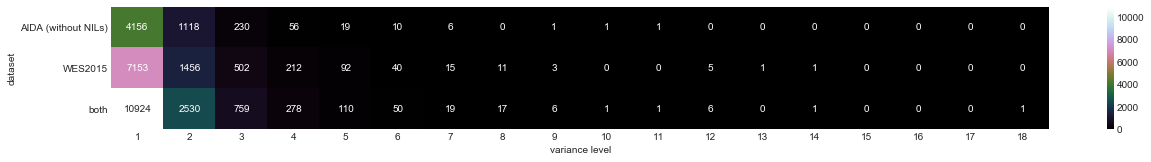

In [31]:
plot_utils.annotated_heatmap(['AIDA (without NILs)', 'WES2015', 'both'],
                  [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
                  [4156, 1118, 230, 56, 19, 10, 6, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
                  7153, 1456, 502, 212, 92, 40, 15, 11, 3, 0, 0, 5, 1, 1, 0, 0, 0, 0,
                   10924, 2530, 759, 278, 110, 50, 19, 17, 6, 1, 1, 6, 0, 1, 0, 0, 0, 1
                  ],
                  x_lbl='variance level'
)

### 10) Correlation between frequency of forms and ambiguity

<span style="background-color:lightgreen">Section 5.4. of the paper</span>

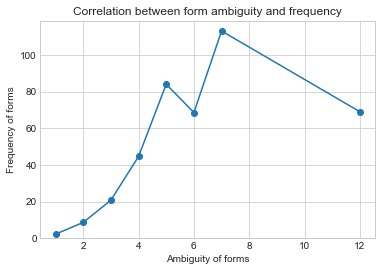

In [32]:
plot_utils.frequency_correlation(ambiguity, 
                                 all_cnt_forms, 
                                 title='Correlation between form ambiguity and frequency', 
                                 x_label='Ambiguity of forms', 
                                 y_label='Frequency of forms',
                                 save=save)

In [33]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline




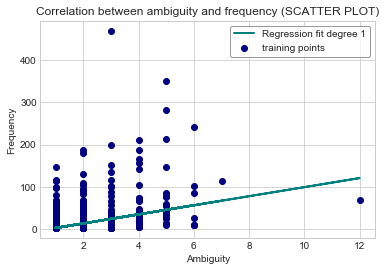

In [34]:
form_y_freq, form_x_amb = plot_utils.prepare_scatter_plot(
    all_cnt_forms, ambiguity)

plot_utils.scatter_plot(form_x_amb, form_y_freq,
                        x_axis='Ambiguity',
                        y_axis='Frequency',
                        title='Correlation between ambiguity and frequency (SCATTER PLOT)',
                        save=True,
                        degree=1
                        )


In [35]:
correlation, significance = spearmanr(form_x_amb,form_y_freq)
print('The Spearman correlation between X and Y is:', correlation, '. Significance: ', significance)

The Spearman correlation between X and Y is: 0.360058589556 . Significance:  0.0


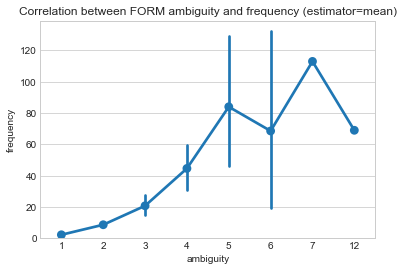

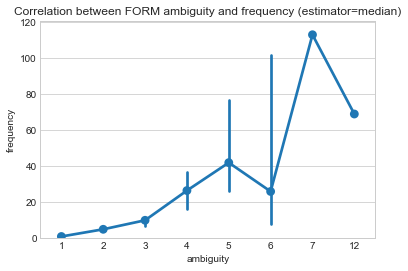

In [36]:
plot_utils.plot_line_with_whiskers(form_x_amb, form_y_freq,
                        xl='ambiguity',
                        yl='frequency',
                        title='Correlation between FORM ambiguity and frequency',
                        save=save)

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: divide by zero encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/nonparametric/_kernel_base.py:514: RuntimeWarning: invalid value encountered in true_divide
  dens = Kval.prod(axis=1) / np.prod(bw[iscontinuous])
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/contour.py:1514: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-pa

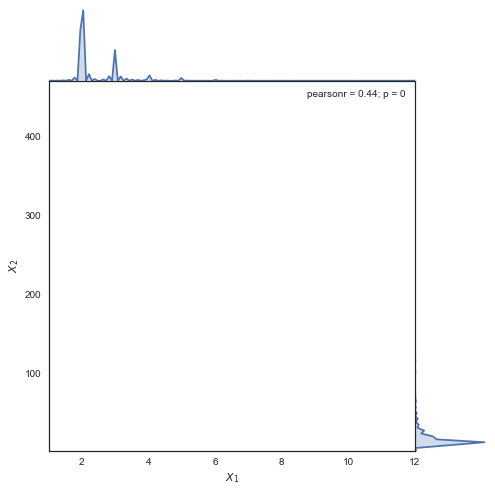

In [37]:
%matplotlib inline
import seaborn as sns
import pandas as pd
sns.set(style='white')

print(type(form_x_amb), type(form_y_freq))
x1 = pd.Series(form_x_amb, name="$X_1$")
x2 = pd.Series(form_y_freq, name="$X_2$")
g=sns.jointplot(x1, x2, kind='kde', size=7, space=0)

In [38]:
bp_data = plot_utils.prepare_box_plot(form_x_amb, form_y_freq)

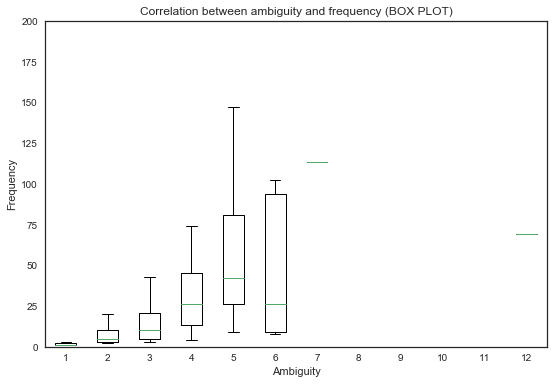

In [39]:
plot_utils.box_plot(bp_data, x_axis='Ambiguity', 
                    y_axis='Frequency',
                    title='Correlation between ambiguity and frequency (BOX PLOT)',
                    y_lim=200,
                    save=save)

### 11) Correlation between frequency of instances and variance

<span style="background-color:lightgreen">Section 5.4. of the paper</span>

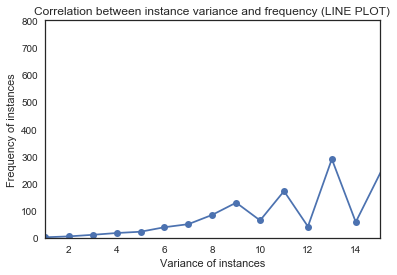

In [40]:
plot_utils.frequency_correlation(variance, 
                                 all_cnt_instances, 
                                 title='Correlation between instance variance and frequency (LINE PLOT)', 
                                 x_label='Variance of instances', 
                                 y_label='Frequency of instances',
                                 xlim=[1,15],
                                 save=save)

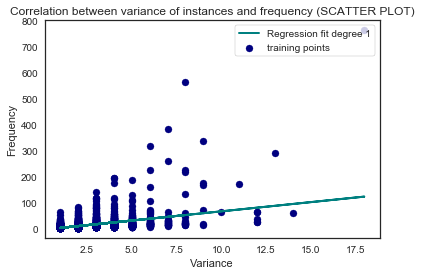

In [41]:

insta_y_freq, insta_x_var = plot_utils.prepare_scatter_plot(
    all_cnt_instances, variance)


plot_utils.scatter_plot(insta_x_var, insta_y_freq, 
                        x_axis='Variance',
                        y_axis='Frequency',
                        title='Correlation between variance of instances and frequency (SCATTER PLOT)',
                        save=True
                        )


In [42]:
correlation, significance = spearmanr(insta_x_var, insta_y_freq)
print('The Spearman correlation between X and Y is:', correlation, '. Significance: ', significance)

The Spearman correlation between X and Y is: 0.68111144415 . Significance:  0.0


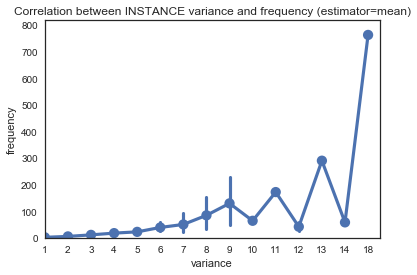

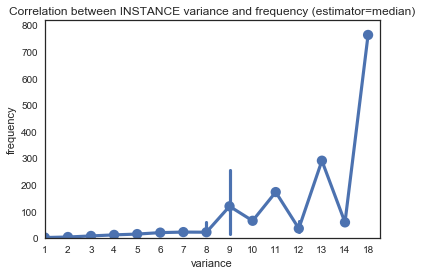

In [73]:
plot_utils.plot_line_with_whiskers(insta_x_var, insta_y_freq,
                        xl='variance',
                        yl='frequency',
                        title='Correlation between INSTANCE variance and frequency',
                        xlim=[0,None],
                        save=save)

In [44]:
bp_data = plot_utils.prepare_box_plot(insta_x_var, insta_y_freq)

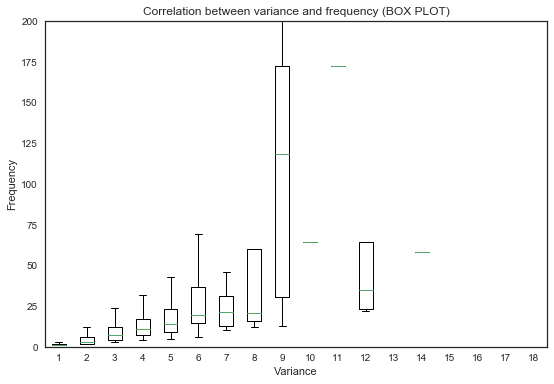

In [45]:
plot_utils.box_plot(bp_data, x_axis='Variance', 
                    y_axis='Frequency',
                    title='Correlation between variance and frequency (BOX PLOT)',
                    y_lim=200,
                    save=save)

### 12) Correlation between PageRank and variance

<span style="background-color:lightgreen">Section 5.4. of the paper</span>

In [46]:
all_pr_instances = {}
for article in all_articles:
    for mention in article.entity_mentions:
        if mention.gold_link!='--NME--' and (not skip_zeros or int(mention.gold_pr)>0):
            all_pr_instances[mention.gold_link]=int(mention.gold_pr)

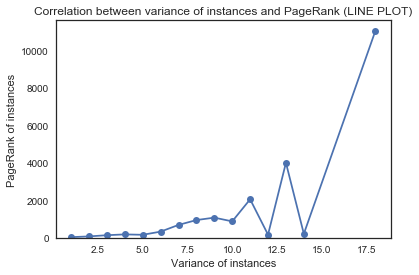

In [47]:
plot_utils.frequency_correlation(variance, 
                                 all_pr_instances, 
                                 title='Correlation between variance of instances and PageRank (LINE PLOT)',
                                 x_label='Variance of instances', 
                                 y_label='PageRank of instances',
                                 save=save)

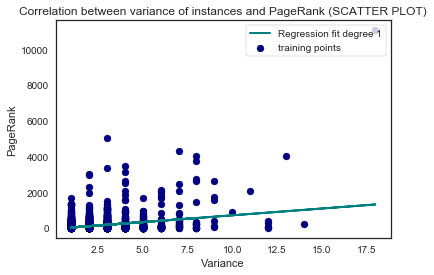

In [48]:
insta_y_pr, insta_x_var2 = plot_utils.prepare_scatter_plot(
    all_pr_instances, variance)

plot_utils.scatter_plot(insta_x_var2, insta_y_pr, 
                        x_axis='Variance',
                        y_axis='PageRank',
                        title='Correlation between variance of instances and PageRank (SCATTER PLOT)',
                        save=True
                        )

In [49]:
correlation, significance = spearmanr(insta_x_var2, insta_y_pr)
print('The Spearman correlation between X and Y is:', correlation, '. Significance: ', significance)

The Spearman correlation between X and Y is: 0.246141375629 . Significance:  1.81637956883e-175


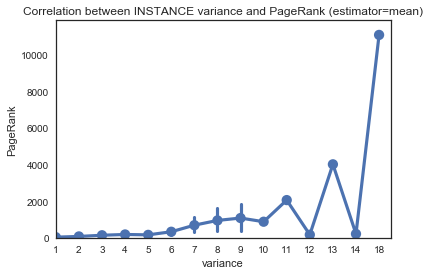

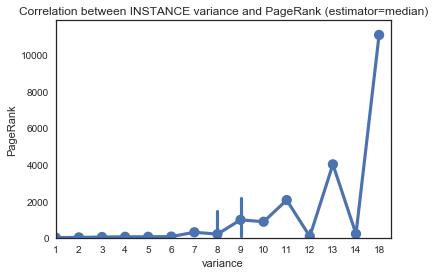

In [74]:
plot_utils.plot_line_with_whiskers(insta_x_var2, insta_y_pr,
                        xl='variance',
                        yl='PageRank',
                        title='Correlation between INSTANCE variance and PageRank',
                        xlim=[0,None],
                        save=save)

In [51]:
bp_data = plot_utils.prepare_box_plot(insta_x_var2, insta_y_pr)

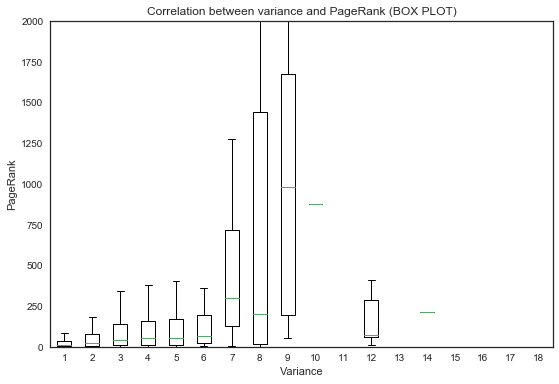

In [52]:
plot_utils.box_plot(bp_data, x_axis='Variance', 
                    y_axis='PageRank',
                    title='Correlation between variance and PageRank (BOX PLOT)',
                    y_lim=2000,
                    save=save)

### 13) Correlation between PageRank and frequency

In [75]:
all_pr_instances

{'Tokyo': 550,
 'Costa_Rica_national_football_team': 17,
 'Chile_national_football_team': 20,
 'Liberia': 149,
 'Costa_Rica': 280,
 'Marcelo_Salas': 2,
 'Atlanta_Braves': 68,
 'Chicago_Cubs': 99,
 'Atlanta': 459,
 'Fred_McGriff': 3,
 'Colorado': 380,
 'Ellis_Burks': 2,
 'Colorado_Rockies': 41,
 'Pittsburgh_Pirates': 82,
 'Vinny_Castilla': 1,
 'Dante_Bichette': 1,
 'Miami_Marlins': 41,
 'Kevin_Brown_(right-handed_pitcher)': 2,
 'Cincinnati_Reds': 84,
 'Los_Angeles': 1148,
 'Mike_Piazza': 7,
 'Los_Angeles_Dodgers': 84,
 'New_York_Mets': 84,
 'San_Diego': 304,
 'Rickey_Henderson': 11,
 'San_Diego_Padres': 54,
 'Philadelphia_Phillies': 88,
 'San_Francisco': 684,
 'Pedro_Martínez': 9,
 'Montreal_Expos': 37,
 'San_Francisco_Giants': 75,
 'Houston': 355,
 'Houston_Astros': 57,
 'St._Louis_Cardinals': 102,
 'April_26': 2,
 '1785': 1,
 'French_Americans': 30,
 'Ornithology': 78,
 'Natural_history': 156,
 'Painting': 240,
 'John_James_Audubon': 18,
 'Bird': 831,
 'The_Birds_of_America': 3,
 '182

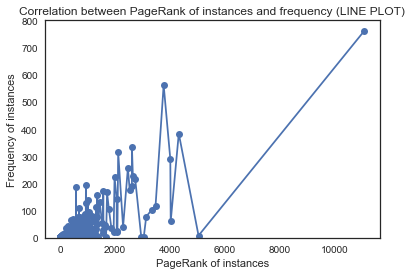

In [53]:
plot_utils.frequency_correlation(all_pr_instances, 
                                 all_cnt_instances, 
                                 title='Correlation between PageRank of instances and frequency (LINE PLOT)', 
                                 x_label='PageRank of instances', 
                                 y_label='Frequency of instances',
                                 save=save)

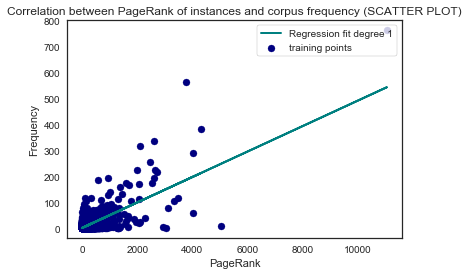

In [54]:
insta_x_pr_2, insta_y_freq2 = plot_utils.prepare_scatter_plot(
    all_pr_instances, all_cnt_instances)

plot_utils.scatter_plot(insta_x_pr_2, insta_y_freq2, 
                        x_axis='PageRank',
                        y_axis='Frequency',
                        title='Correlation between PageRank of instances and corpus frequency (SCATTER PLOT)',
                        save=True
                        )

In [55]:
correlation, significance = spearmanr(insta_x_pr_2, insta_y_freq2)
print('The Spearman correlation between X and Y is:', correlation, '. Significance: ', significance)

The Spearman correlation between X and Y is: 0.208004858385 . Significance:  9.09466458766e-125


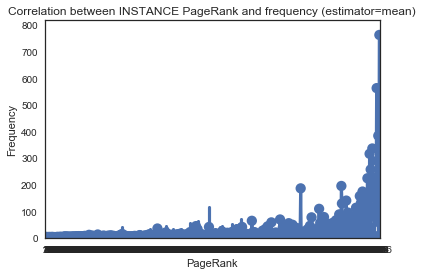

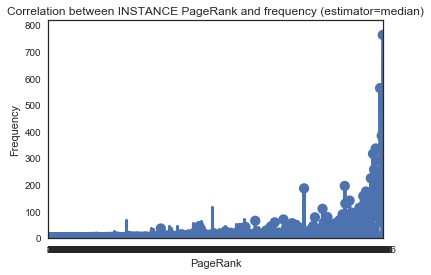

In [56]:
plot_utils.plot_line_with_whiskers(insta_x_pr_2, insta_y_freq2,
                        xl='PageRank',
                        yl='Frequency',
                        title='Correlation between INSTANCE PageRank and frequency',
                        save=save)

### 14) Inspection of the distribution within the instances of a single form

<span style="background-color:lightgreen">Section 5.5. of the paper</span>

In [57]:
form='World Cup' # this is the form with max ambiguity (of 12) in our dataset

insts=plot_utils.get_form_distribution(all_articles, form)

import numpy as np
import matplotlib.pyplot as plt
ks=[]
vs=[]
for kv in insts:
    ks.append(kv[0])
    vs.append(kv[1])

x = np.arange(len(ks))

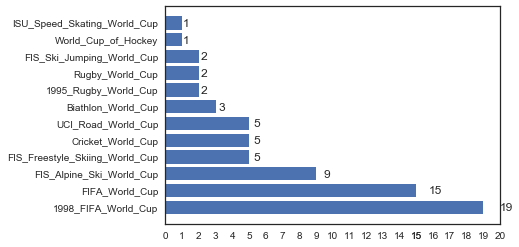

In [58]:
#fig = plt.figure()
fig, ax = plt.subplots()

br = ax.barh(x, vs)
plt.yticks(x, ks, rotation=0)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,15,16,17,18,19,20])

plot_utils.autolabelh(br,ax)

fig.savefig('img/world_cup_form_freq.png', bbox_inches='tight')

### 15) Inspection of the distribution of PageRank within the instances of a single form

<span style="background-color:lightgreen">Section 5.5. of the paper</span>

In [59]:
form='World Cup' # this is the form with max ambiguity
import operator


ks=[]
vs=[]
entries={}
for instance in interpretations[form]:
    print(instance, '\t', all_pr_instances[instance])
    entries[instance]=all_pr_instances[instance]

    
entries = sorted(entries.items(),key = operator.itemgetter(1),reverse = True)

for k,v in entries:
    ks.append(k)
    vs.append(v)

x = np.arange(len(ks))

Cricket_World_Cup 	 34
FIFA_World_Cup 	 186
1998_FIFA_World_Cup 	 59
Biathlon_World_Cup 	 5
FIS_Ski_Jumping_World_Cup 	 9
UCI_Road_World_Cup 	 4
World_Cup_of_Hockey 	 6
1995_Rugby_World_Cup 	 16
Rugby_World_Cup 	 52
FIS_Freestyle_Skiing_World_Cup 	 3
FIS_Alpine_Ski_World_Cup 	 21
ISU_Speed_Skating_World_Cup 	 3


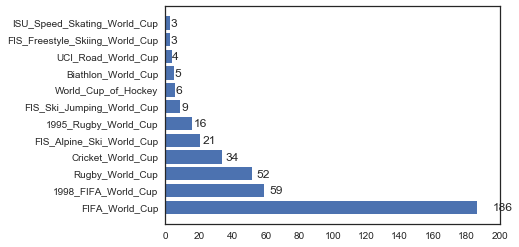

In [60]:
fig, ax = plt.subplots()

br=plt.barh(x, vs)
plt.yticks(x, ks, rotation=0)
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])

plot_utils.autolabelh(br, ax)

fig.savefig('img/world_cup_form_pr.png', bbox_inches='tight')

In [61]:
prs=[]
freqs=[]
for form2, pr in reversed(entries):
    for form, freq in insts:
        if form==form2:
            print(form, freq, pr)
            freqs.append(freq)
            prs.append(pr)

ISU_Speed_Skating_World_Cup 1 3
FIS_Freestyle_Skiing_World_Cup 5 3
UCI_Road_World_Cup 5 4
Biathlon_World_Cup 3 5
World_Cup_of_Hockey 1 6
FIS_Ski_Jumping_World_Cup 2 9
1995_Rugby_World_Cup 2 16
FIS_Alpine_Ski_World_Cup 9 21
Cricket_World_Cup 5 34
Rugby_World_Cup 2 52
1998_FIFA_World_Cup 19 59
FIFA_World_Cup 15 186


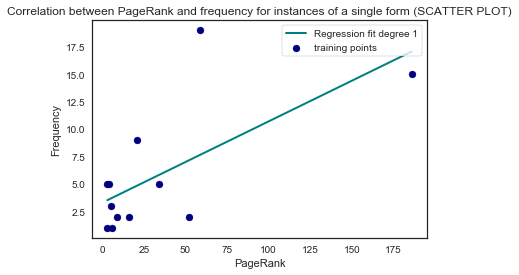

In [62]:
plot_utils.scatter_plot(np.array(prs), np.array(freqs), 
                        x_axis='PageRank',
                        y_axis='Frequency',
                        title='Correlation between PageRank and frequency for instances of a single form (SCATTER PLOT)',
                        save=True
                        )

In [63]:
correlation, significance = spearmanr(prs, freqs)
print('The Spearman correlation between X and Y is:', correlation, '. Significance: ', significance)

The Spearman correlation between X and Y is: 0.50360974509 . Significance:  0.0950708553023


### 16) Inspection of the frequency distribution within the forms of a single instance

<span style="background-color:lightgreen">Section 5.5. of the paper</span>

In [64]:
instance='United_States' # this is both the instance with max variance and max frequency

refs=plot_utils.get_instance_distribution(all_articles, instance)

ks=[]
vs=[]
for kv in refs:
    ks.append(kv[0])
    vs.append(kv[1])

x = np.arange(len(ks))

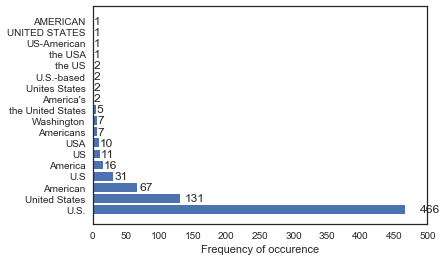

In [65]:
fig, ax = plt.subplots()

br=plt.barh(x, vs)
plt.yticks(x, ks, rotation=0)
plt.xticks([0,50,100,150,200,250,300,350,400,450,500])
plt.xlabel('Frequency of occurence')

plot_utils.autolabelh(br,ax)

fig.savefig('img/world_cup_insta_freq.png', bbox_inches='tight')

### 17) Entropy

In [66]:
import sys
sys.exit()

SystemExit: 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2870: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
from scipy.stats import entropy
all_entropies=[]
for form in interpretations:
    counts=plot_utils.get_form_counts(all_articles, form)
    counts=list(counts)
    all_entropies.append(entropy(counts, base=len(counts)))

In [ ]:


sns.distplot(all_entropies, kde=False)

In [ ]:
all_entropies_lz = []
for ent in all_entropies:
    if ent>0.0:
        all_entropies_lz.append(ent)

In [ ]:
len(all_entropies_lz)

In [ ]:
sns.distplot(all_entropies_lz, kde=False)

In [ ]:
all_entropies_lz